# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [84]:
# import modules & load data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# Initial EDA

In [85]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [86]:
# Set options to inspect all columns:
pd.options.display.max_columns = 65

data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [87]:
# check for duplicates

data.duplicated().sum()

0

In [88]:
# grab df of just race and call columns
df = data[['race','call']]

# check for null values
df.isnull().any()

race    False
call    False
dtype: bool

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


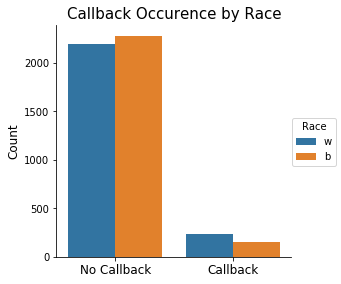

In [90]:
# Create a frequency graph of callback status by race:
fig = sns.factorplot(x='call',hue='race', data=df, kind='count', size=4)
fig._legend.set_title('Race')

# Label tick marks, axes and add a title:
fig.set_xticklabels(['No Callback','Callback'], fontsize=12)
fig = plt.xlabel('')
fig = plt.ylabel('Count', fontsize=12)
fig = plt.title('Callback Occurence by Race', fontsize=15)

plt.show()

# 1. What test is appropriate for this problem? Does CLT apply?

A two sided hypothesis (2 sample t) test is an appropriate test. CLT seems applicable as if you sample the data over and over, the ratios for the data would be approximately normal. The sample size is large enough (n > 30) though it's not more than 10% of the entire population. The sample is also comprised of independent data points.

# 2. What are the null and alternate hypotheses?

$H_{o}$ : An association between a candidate's listed race and the call-back rate does not exist.

$H_{A}$ : An association between a candidate's listed race and the call-back rate exists.

# 3. Compute margin of error, confidence interval, and p-value.

In [91]:
b_data = df[df['race'] == 'b']
b_call_rate = sum(b_data['call']) / len(b_data)

w_data = df[df['race'] == 'w']
w_call_rate = sum(w_data['call'] / len(w_data))

var_b = b_call_rate * (1 - b_call_rate)
var_w = w_call_rate * (1 - w_call_rate)
total_var = (var_b / len(b_data)) + (var_w / len(w_data))

standard_error = np.sqrt(total_var)
margin_error = standard_error * 1.96

print('The margin of error for the data is {}'.format(margin_error))

The margin of error for the data is 0.01525540648959348


In [92]:
diff_of_means = np.abs(w_data.mean() - b_data.mean())
confidence_interval = (diff_of_means - margin_error, diff_of_means + margin_error)

print('The confidence interval is [{}, {}]'.format(confidence_interval[0]['call'], confidence_interval[1]['call']))

The confidence interval is [0.01677744835615158, 0.047288261353969574]


In [93]:
statistic, p_value = stats.ttest_ind(b_data['call'], w_data['call'])

print('The p value is {}'.format(p_value))

The p value is 3.940802103128886e-05


# 4. Write a story describing the statistical significance in the context or the original problem.

In order to investigate the potential effects of racial discrimination on callback rates for job applicants within the United States, researchers randomly assigned identical resumes to black-sounding or white-sounding names and recorded the impact on responses to applications from employers. 

We performed an analysis of the data captured by said researchers to see what effect a difference in race had on callback success. Our investigation resulted in an observation that racial discrimination has a statistically significant effect upon callback rate. Applications that carried a white-sounding name were more likely to be engaged by an employer.

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis performed allows for a conclusion that race and name are significant factors in terms of callback success, but is not complete enough to determine whether these are the most important factors. Further investigation of other variables (education, experience, skills, etc.) would be needed in order to make that determination. The way these were initially controlled in the data gathering process could also end up requiring a change.